### Inicio Spark Session
En esta primera celda importamos y configuramos todo lo necesario para iniciar nuestra sesión de Spark

In [2]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    .config("spark.executor.instances", "4") // Número de ejecutores
    .config("spark.executor.memory", "4g") // Memoria por ejecutor
    .config("spark.executor.cores", "2") // Núcleos por ejecutor
    .config("spark.driver.memory", "4g") // Memoria del driver
    .config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Getting spark JARs
Creating SparkSession


Spark UI

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@166434b6
import spark.implicits._

# Carga de datos
Datos diarios del balance electrico a nivel nacional

In [4]:
val filePath = "data/ModelosCsv/datasetTotalBalanceNacional11-24.csv/part-00000-df8669cd-f52c-4926-8f59-e1ce9858b200-c000.csv"         
val dataFrameBalance: DataFrame = spark.read
  .option("header", "true") // Si el archivo tiene un encabezado
  .option("inferSchema", "true") // Para inferir automáticamente el esquema
  .csv(filePath)

: 

In [4]:
org.apache.spark.sql.catalyst.encoders.OuterScopes.addOuterScope(this);
case class Balance(
    Familia: String,
    Tipo: String,
    FechaCompleta: java.sql.Timestamp,
    Valor: Double,
    Porcentaje: Double,
    Dia: String,
    Hora: String,
    BajasEmisiones: Boolean
)

val dataSetBalance: Dataset[Balance] = dataFrameBalance.as[Balance]

cmd4.sc:13: not found: value dataFrameBalance
val dataSetBalance: Dataset[Balance] = dataFrameBalance.as[Balance]
                                       ^Compilation Failed

: 

In [4]:
//Podemos aplicar map
dataSetBalance.map(b => b.copy(Valor = b.Valor * 1000)).show()

show at cmd3.sc:1

1 / 1

+---------+----------+-------------------+------------+-------------------+-------------------+--------+--------------+
|  Familia|      Tipo|      FechaCompleta|       Valor|         Porcentaje|                Dia|    Hora|BajasEmisiones|
+---------+----------+-------------------+------------+-------------------+-------------------+--------+--------------+
|Renovable|Hidráulica|2010-12-31 23:00:00|1.32922642E8|  0.730243950800116|2010-12-31 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-01 23:00:00| 1.2247516E8|0.46094258667156873|2011-01-01 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-02 23:00:00|1.46861638E8| 0.5886483989680635|2011-01-02 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-03 23:00:00|1.45876053E8| 0.5383243444180309|2011-01-03 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-04 23:00:00|1.58946134E8| 0.4184631870402314|2011-01-04 00:00:00|23:00:00|          true|
|Renovable|Hidráulica|2011-01-05 23:00:0

### Gráfico evolución anual distintos tipos de energia

collect at cmd67.sc:12

3 / 3

collect at cmd67.sc:12

8 / 8

collect at cmd67.sc:12

8 / 8

collect at cmd67.sc:12

8 / 8

collect at cmd67.sc:13

3 / 3

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

3 / 3

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

3 / 3

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

collect at cmd67.sc:13

8 / 8

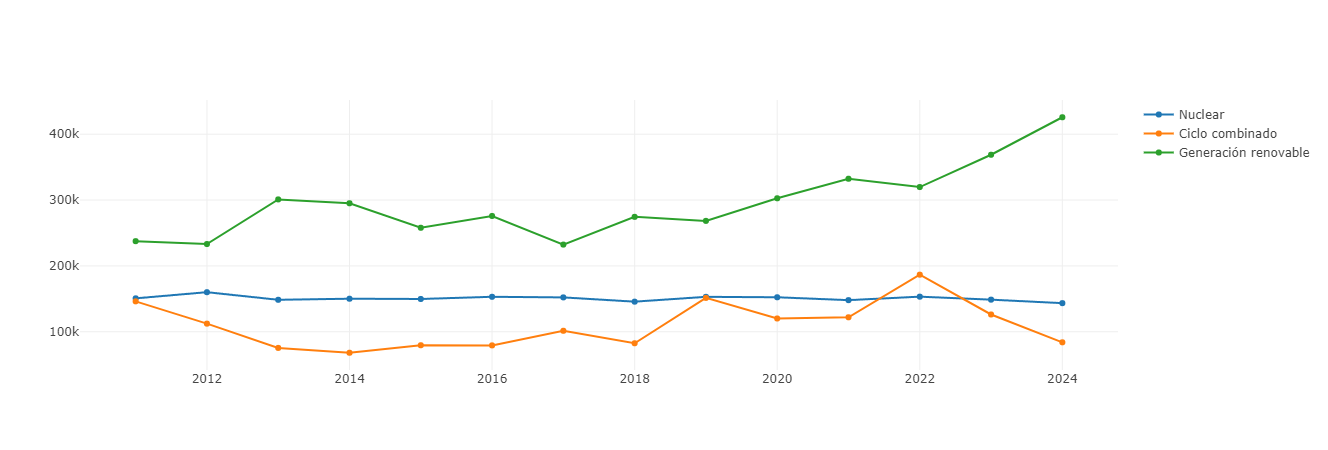

defined function AnalisisEnergiasAnual
EnergiasParaAnalizar: Seq[String] = List(
  "Nuclear",
  "Ciclo combinado",
  "Generaci\u00f3n renovable"
)

In [68]:
def AnalisisEnergiasAnual(listaEnergias: Seq[String], dataFrameBalance: DataFrame): Unit = {
  // Agrupar y calcular la media para datos renovables
  def calcularMediaAnual(df: DataFrame, tipo: String): DataFrame = {
    df.filter(col("Tipo") === tipo)
      .filter(date_format(col("FechaCompleta"), "yyyy") =!= "2010")  
      .groupBy(date_format(col("FechaCompleta"), "yyyy").as("Año"))
      .agg(avg("Valor").as("ValorPromedio"))
      .orderBy("Año")
  }

  val valores = listaEnergias.map(tipoEnergia => calcularMediaAnual(dataFrameBalance, tipoEnergia))
  val fechas = valores.head.select("Año").as[String].collect.toSeq
  val seqValores = valores.map(valor => valor.select("ValorPromedio").as[Double].collect.toSeq)

  val traces = listaEnergias.zip(seqValores).map { case (nombre, seqValor) =>
    Scatter(fechas, seqValor, name = nombre)
  }

  val data = traces
  plot(data)
}

val EnergiasParaAnalizar = Seq("Nuclear","Ciclo combinado","Generación renovable")
AnalisisEnergiasAnual(EnergiasParaAnalizar, dataFrameBalance)

collect at cmd5.sc:12

3 / 3

collect at cmd5.sc:12

8 / 8

collect at cmd5.sc:12

8 / 8

collect at cmd5.sc:12

8 / 8

collect at cmd5.sc:13

3 / 3

collect at cmd5.sc:13

8 / 8

collect at cmd5.sc:13

8 / 8

collect at cmd5.sc:13

8 / 8

collect at cmd5.sc:13

3 / 3

collect at cmd5.sc:13

8 / 8

collect at cmd5.sc:13

8 / 8

collect at cmd5.sc:13

8 / 8

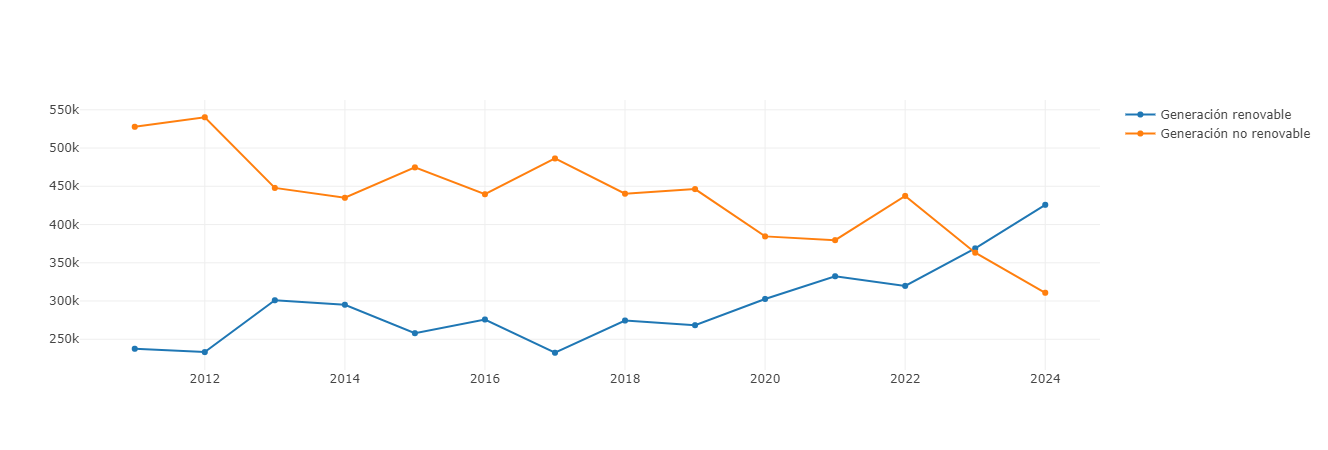

EnergiasParaAnalizar: Seq[String] = List(
  "Generaci\u00f3n renovable",
  "Generaci\u00f3n no renovable"
)

In [7]:
val EnergiasParaAnalizar = Seq("Generación renovable", "Generación no renovable")
AnalisisEnergiasAnual(EnergiasParaAnalizar, dataFrameBalance)

collect at cmd7.sc:15

3 / 3

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

3 / 3

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:15

8 / 8

collect at cmd7.sc:16

3 / 3

collect at cmd7.sc:16

8 / 8

collect at cmd7.sc:16

8 / 8

collect at cmd7.sc:16

8 / 8

collect at cmd7.sc:16

8 / 8

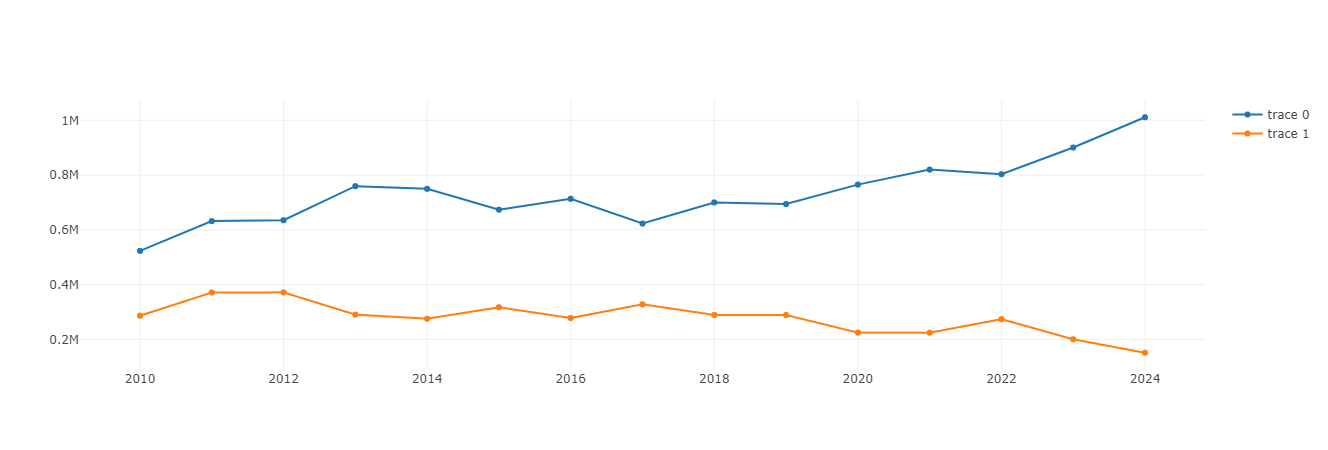

defined function AnalisisGruposEnergias
bajasEmisiones: Seq[String] = List(
  "Residuos renovables",
  "Solar fotovoltaica",
  "Solar t\u00e9rmica",
  "Otras renovables",
  "Nuclear",
  "Hidroe\u00f3lica",
  "Generaci\u00f3n renovable",
  "E\u00f3lica",
  "Hidr\u00e1ulica",
  "Turbinaci\u00f3n bombeo"
)
altasEmisiones: Seq[String] = List(
  "Turbina de gas",
  "Residuos no renovables",
  "Cogeneraci\u00f3n",
  "Motores di\u00e9sel",
  "Carb\u00f3n",
  "Ciclo combinado",
  "Turbina de vapor",
  "Fuel + Gas"
)

In [8]:
def AnalisisGruposEnergias(listaGrupos: Seq[Seq[String]], dataFrameBalance: DataFrame): Unit = {
    
    def valorAnual(df: DataFrame): DataFrame = {
        df.groupBy(col("FechaCompleta"))
          .agg(sum("Valor").as("ValorTotalPorDia"))
          .groupBy(date_format(col("FechaCompleta"), "yyyy").as("Año"))
          .agg(avg("ValorTotalPorDia").as("ValorPromedio"))
          .orderBy("Año")
    }
    
    val listaDf = listaGrupos.map{
        grupo => dataFrameBalance.filter(col("Tipo").isin(grupo:_*))
    }
    val valores = listaDf.map(valorAnual(_))
    val seqValores = valores.map(valor => valor.select("ValorPromedio").as[Double].collect.toSeq)
    val fechas = valores.head.select("Año").as[String].collect.toSeq

    val traces = listaGrupos.zip(seqValores).map { case (nombre, seqValor) =>
        Scatter(fechas, seqValor)
    }

  val data = traces
  plot(data)
}

val bajasEmisiones = Seq(
  "Residuos renovables",
  "Solar fotovoltaica",
  "Solar térmica",
  "Otras renovables",
  "Nuclear",
  "Hidroeólica",
  "Generación renovable",
  "Eólica",
  "Hidráulica",
  "Turbinación bombeo"
)
val altasEmisiones = Seq(
  "Turbina de gas",
  "Residuos no renovables",
  "Cogeneración",
  "Motores diésel",
  "Carbón",
  "Ciclo combinado",
  "Turbina de vapor",
  "Fuel + Gas"
)


AnalisisGruposEnergias(Seq(bajasEmisiones, altasEmisiones), dataFrameBalance)

### Analisis mensual de un año de distintos tipos de energias

collect at cmd6.sc:11

3 / 3

collect at cmd6.sc:11

8 / 8

collect at cmd6.sc:11

8 / 8

collect at cmd6.sc:11

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

3 / 3

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

collect at cmd6.sc:12

8 / 8

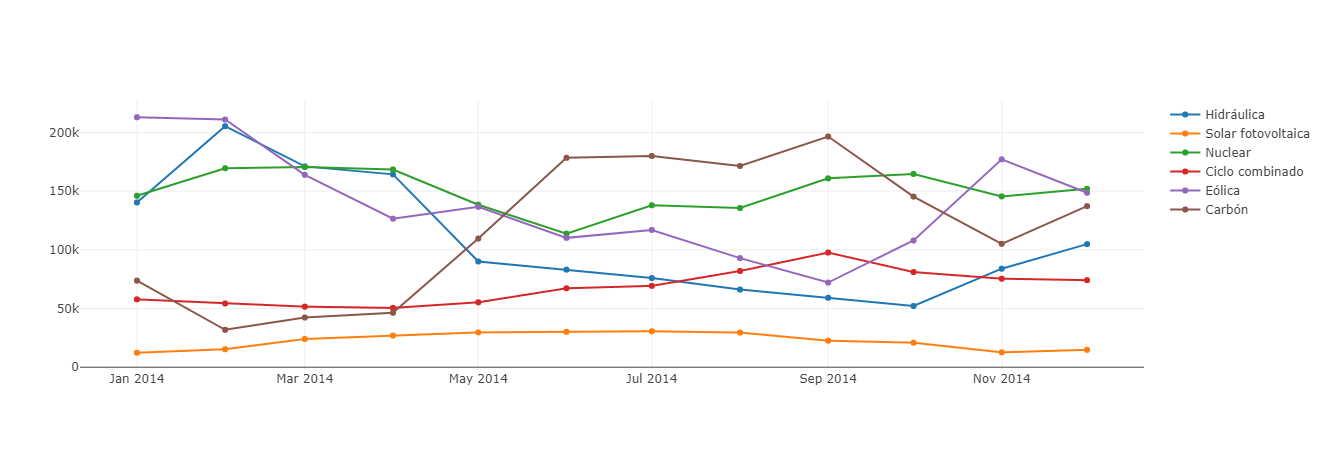

defined function AnalisisEnergiasMensual
dataFrameBalance2024: Dataset[Row] = [Familia: string, Tipo: string ... 6 more fields]
EnergiasParaAnalizar: Seq[String] = List(
  "Hidr\u00e1ulica",
  "Solar fotovoltaica",
  "Nuclear",
  "Ciclo combinado",
  "E\u00f3lica",
  "Carb\u00f3n"
)

In [7]:
def AnalisisEnergiasMensual(listaEnergias: Seq[String], df: DataFrame): Unit = {
  // Agrupar y calcular la media para datos renovables
  def calcularMediaMensual(df1: DataFrame, tipo: String): DataFrame = {
    df1.filter(col("Tipo") === tipo)
      .groupBy(date_format(col("FechaCompleta"), "yyyy-MM").as("Mes"))
      .agg(avg("Valor").as("ValorPromedio"))
      .orderBy("Mes")
  }

  val valores = listaEnergias.map(tipoEnergia => calcularMediaMensual(df, tipoEnergia))
  val seqFechas = valores.head.select("Mes").as[String].collect.toSeq
  val seqValores = valores.map(valor => valor.select("ValorPromedio").as[Double].collect.toSeq)

  val traces = listaEnergias.zip(seqValores).map { case (nombre, seqValor) =>
    Scatter(seqFechas, seqValor, name = nombre)
  }

  val data = traces
  plot(data)
}

val dataFrameBalance2024 = dataFrameBalance.filter(date_format(col("FechaCompleta"),"yyyy") === "2014") //Elegimos año
val EnergiasParaAnalizar = Seq("Hidráulica", "Solar fotovoltaica", "Nuclear", "Ciclo combinado", "Eólica","Carbón")

AnalisisEnergiasMensual(EnergiasParaAnalizar, dataFrameBalance2024)

#### Top 5 tipos de energías por su generación anual

head at cmd74.sc:11

3 / 3

head at cmd74.sc:11

8 / 8

head at cmd74.sc:12

3 / 3

head at cmd74.sc:12

8 / 8

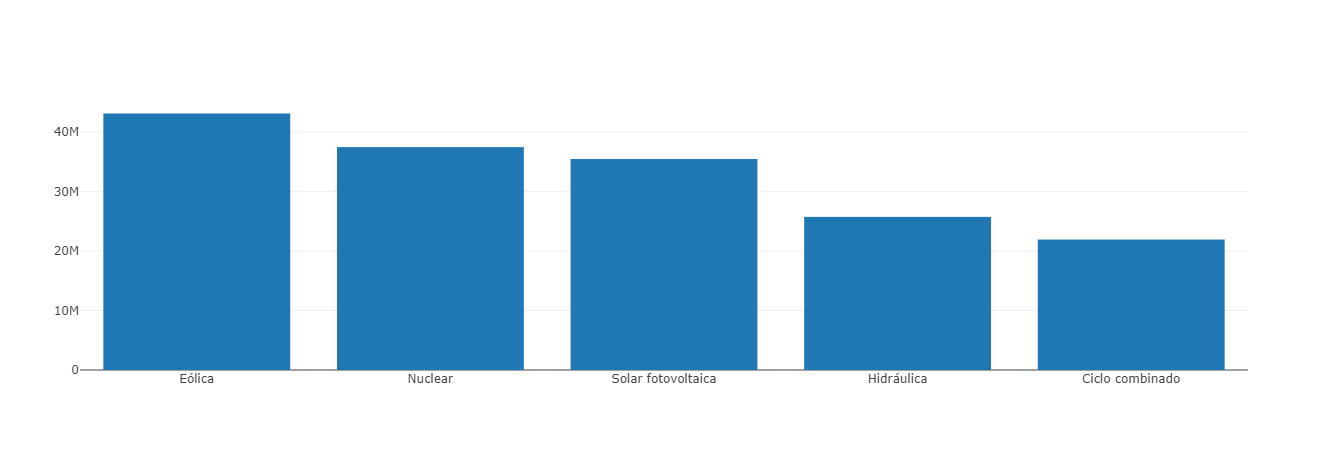

defined function top5anual
res74_1: String = "plot-8b9d4977-37cb-4e34-a690-528f776af82a"

In [75]:
def top5anual (Año: Int) = {
val energiasOrdenadas= dataFrameBalance
    .filter(date_format(col("FechaCompleta"),"yyyy") === Año) //Año
    .filter(col("Familia") =!= "Demanda")
    .filter(!col("Tipo").isin("Generación renovable", "Generación no renovable"))
    .groupBy($"Tipo")
    //.groupBy(date_format(col("FechaCompleta"), "yyyy-MM").as("Mes"))
    .agg(sum("Valor").as[Double].as("ValorTotal"))
    .orderBy($"ValorTotal".desc)

val seqValores = energiasOrdenadas.select($"ValorTotal").as[Double].head(5).toSeq
val seqTipo = energiasOrdenadas.select($"Tipo").as[String].head(5).toSeq
val data = Seq(Bar(
    seqTipo,
    seqValores,
))

plot(data)
}
top5anual(2024)

## Crecimiento de las energias

first at cmd72.sc:26

3 / 3

first at cmd72.sc:26

8 / 8

first at cmd72.sc:26

8 / 8

first at cmd72.sc:26

8 / 8

first at cmd72.sc:26

8 / 8

first at cmd72.sc:26

1 / 1

collect at cmd72.sc:31

3 / 3

collect at cmd72.sc:31

8 / 8

collect at cmd72.sc:31

8 / 8

collect at cmd72.sc:31

8 / 8

collect at cmd72.sc:31

8 / 8

collect at cmd72.sc:32

3 / 3

collect at cmd72.sc:32

8 / 8

collect at cmd72.sc:32

8 / 8

collect at cmd72.sc:32

8 / 8

collect at cmd72.sc:32

8 / 8

Media de Crecimiento Anual: -5.31%


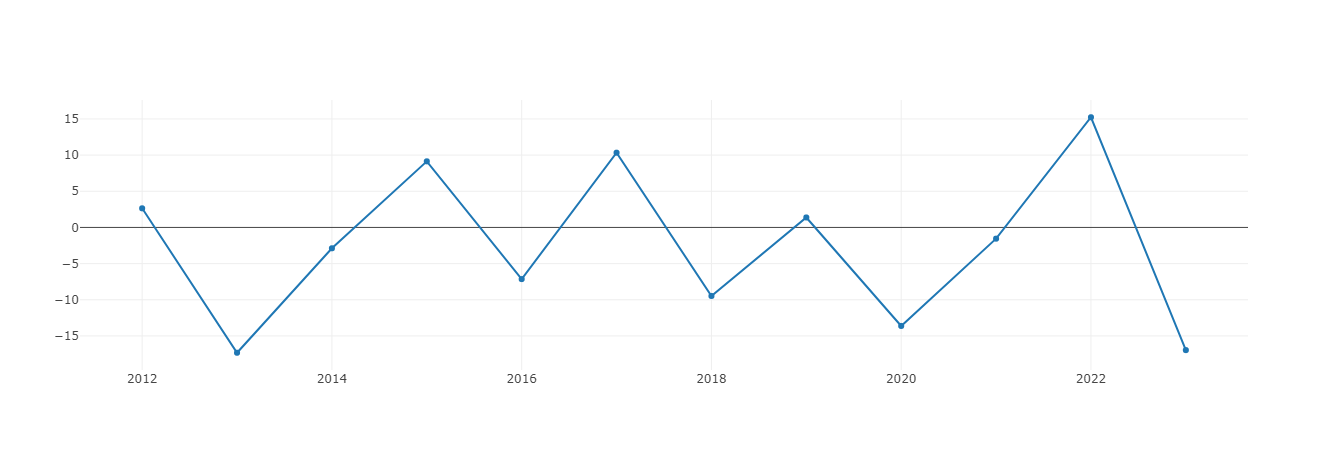

import org.apache.spark.sql.expressions.Window

import org.apache.spark.sql.functions._

defined function crecimientoPorcentualEnergia
res72_3: String = "plot-d6f9b17f-80a9-499a-aa6f-09dd387d218c"

In [73]:
import org.apache.spark.sql.expressions.Window
import org.apache.spark.sql.functions._
def crecimientoPorcentualEnergia(df: DataFrame, energia: String) = {
val df = dataFrameBalance.groupBy($"Tipo", date_format(col("FechaCompleta"), "yyyy").as("Año"))
  .agg(sum("Valor").as("ValorAnual")) // Renombrar la suma para mayor claridad
  .filter($"Tipo" === energia)
  .filter($"Año" =!= 2010)
  .orderBy("Año")

// Definir la ventana para calcular el valor del año anterior
val windowSpec = Window.partitionBy("Tipo").orderBy("Año")

// Calcular el valor del año anterior
val dfWithPreviousYear = df.withColumn("ValorAnterior", lag("ValorAnual", 1).over(windowSpec))

// Calcular el crecimiento porcentual
val dfWithGrowth = dfWithPreviousYear.withColumn(
  "CrecimientoAnualPorcentaje",
  when(col("ValorAnterior").isNotNull, (col("ValorAnual") - col("ValorAnterior")) / col("ValorAnterior") * 100)
    .otherwise(lit(null)) // Si no hay valor anterior, dejar nulo
).filter($"CrecimientoAnualPorcentaje".isNotNull)

val mediaCrecimientoAnual = dfWithGrowth
    .agg(avg("CrecimientoAnualPorcentaje").as("MediaCrecimientoAnual")) //Calcular media
    .select("MediaCrecimientoAnual")
    .as[Double]
    .first()



val seqAños = dfWithGrowth.filter($"Año" =!= 2024).select("Año").as[String].collect.toSeq
val seqPorcentajes = dfWithGrowth.filter($"Año" =!= 2024).select("CrecimientoAnualPorcentaje").as[Double].collect.toSeq
val trace = Scatter(seqAños, seqPorcentajes, name = "Crecimiento")
val data = Seq(trace)
    
printf("Media de Crecimiento Anual: %.2f%%\n", mediaCrecimientoAnual )
plot(data)
}
crecimientoPorcentualEnergia(dataFrameBalance, "Generación no renovable")

In [72]:
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window

def añosParaSustituir(
  dataFrame: DataFrame,
  energia1: String,
  energia2: String,
  añosParaCalculo: Int = 5 // Número de años históricos a considerar para el cálculo del crecimiento anual
): Int = {
  
  // Definir una ventana por Tipo y ordenando por Año
  val windowSpec = Window.partitionBy("Tipo").orderBy("Año")

  // Calcular la producción anual por tipo de energía
  val df = dataFrame.groupBy($"Tipo", date_format(col("FechaCompleta"), "yyyy").as("Año"))
    .agg(sum("Valor").as("ValorAnual"))
    .filter($"Tipo".isin(energia1, energia2)) // Filtrar solo las energías que nos interesan

  // Calcular el crecimiento anual de cada energía
  val dfWithGrowth = df.withColumn("ValorAnterior", lag("ValorAnual", 1).over(windowSpec))
    .withColumn("CrecimientoAnual", 
      when(col("ValorAnterior").isNotNull, (col("ValorAnual") - col("ValorAnterior")) / col("ValorAnterior"))
      .otherwise(lit(null)))

  // Calcular el crecimiento anual promedio de los últimos años para ambas energías
  val crecimientoPromedioPorEnergia = dfWithGrowth
    .filter(col("CrecimientoAnual").isNotNull)
    .groupBy("Tipo")
    .agg(avg("CrecimientoAnual").as("CrecimientoPromedio"))
    .filter(col("Tipo").isin(energia1, energia2))
    .collect()
    .map(row => (row.getString(0), row.getDouble(1)))
    .toMap

  // Obtener los valores iniciales y los crecimientos anuales promedio
  val valorInicialEnergia1 = df.filter(col("Tipo") === energia1).orderBy(desc("Año")).select("ValorAnual").as[Double].head
  val valorInicialEnergia2 = df.filter(col("Tipo") === energia2).orderBy(desc("Año")).select("ValorAnual").as[Double].head

  val crecimientoAnualEnergia1 = crecimientoPromedioPorEnergia.getOrElse(energia1, 0.0)
  val crecimientoAnualEnergia2 = crecimientoPromedioPorEnergia.getOrElse(energia2, 0.0)

  // Variables para simulación
  var valorProyectadoEnergia1 = valorInicialEnergia1
  var valorProyectadoEnergia2 = valorInicialEnergia2
  var añosNecesarios = 0

  // Simular el crecimiento año a año hasta que la energía 1 supere a la energía 2
  while (valorProyectadoEnergia1 < valorProyectadoEnergia2) {
    valorProyectadoEnergia1 *= (1 + crecimientoAnualEnergia1)
    valorProyectadoEnergia2 *= (1 + crecimientoAnualEnergia2)
    añosNecesarios += 1

    // Por si el crecimiento es negativo o muy bajo, evitar un bucle infinito
    if (añosNecesarios > 100) {
      println("El crecimiento no es suficiente para que la energía 1 sustituya a la energía 2 en un tiempo razonable.")
      return -1 // Indicar que no es posible en un tiempo razonable
    }
  }

  añosNecesarios
}

// Ejemplo de uso
val años = añosParaSustituir(dataFrameBalance, "Generación renovable", "Generación no renovable")
println(s"Se necesitarían $años años para que 'Renovable' sustituya a 'No renovable'.")


collect at cmd71.sc:30

3 / 3

collect at cmd71.sc:30

8 / 8

collect at cmd71.sc:30

8 / 8

head at cmd71.sc:36

3 / 3

head at cmd71.sc:36

8 / 8

head at cmd71.sc:37

3 / 3

head at cmd71.sc:37

8 / 8

Se necesitarían 0 años para que 'Renovable' sustituya a 'No renovable'.


import org.apache.spark.sql.functions._

import org.apache.spark.sql.expressions.Window


defined function añosParaSustituir
años: Int = 0